In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


# Загрузить данные из файла “insurance.csv”

In [71]:
data = pd.read_csv('../Datasets_for_work/Data_3/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


возраст, пол, ИМТ, дети, курильщик, регион,расходы

# С помощью метода describe() посмотреть статистику по данным.
# Сделать выводы

In [72]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Выводы: какие выводы?

# Построить гистограммы для числовых показателей.
# Сделать выводы.

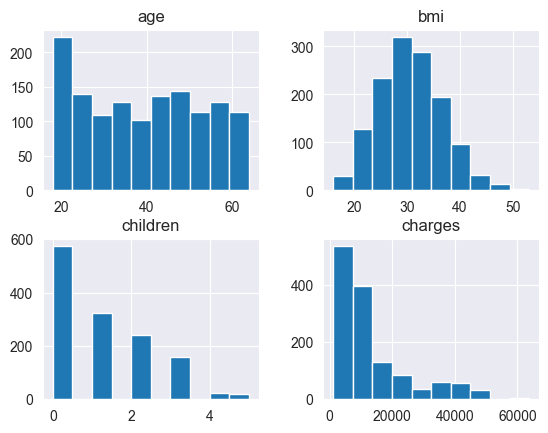

In [73]:
data.hist(edgecolor='white')
plt.show()

Выводы: какие выводы?

C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\filip\PycharmProjects\BigData\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


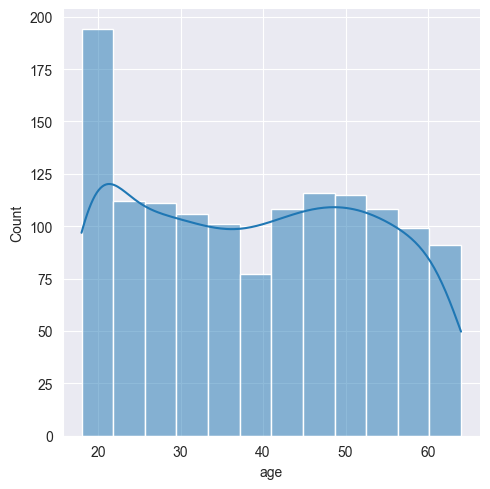

In [74]:
sns.displot(data.age, kde=True)

# Найти меры центральной тенденции и меры разброса для индекса массы тела (bmi) и расходов (charges).
# Отобразить результаты в виде текста и на гистограммах (3 вертикальные линии). Добавить легенду на графики.
# Сделать выводы.

In [75]:
bmi_mean = data['bmi'].mean()
bmi_median = data['bmi'].median()
bmi_mode = data['bmi'].mode().values[0]

charges_mean = data['charges'].mean()
charges_median = data['charges'].median()
charges_mode = data['charges'].mode().values[0]

In [76]:
bmi_std = data['bmi'].std()
charges_std = data['charges'].std()

In [77]:
print("Для BMI:")
print(f"Среднее значение: {bmi_mean}")
print(f"Медиана: {bmi_median}")
print(f"Мода: {bmi_mode}")
print(f"Стандартное отклонение: {bmi_std}")
print("\nДля charges:")
print(f"Среднее значение: {charges_mean}")
print(f"Медиана: {charges_median}")
print(f"Мода: {charges_mode}")
print(f"Стандартное отклонение: {charges_std}")

Для BMI:
Среднее значение: 30.66339686098655
Медиана: 30.4
Мода: 32.3
Стандартное отклонение: 6.098186911679014

Для charges:
Среднее значение: 13270.422265141257
Медиана: 9382.033
Мода: 1639.5631
Стандартное отклонение: 12110.011236694001


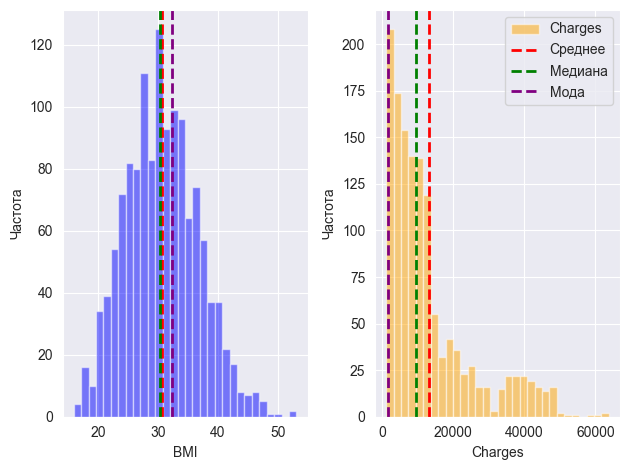

In [78]:
plt.subplot(1, 2, 1)
data['bmi'].hist(alpha=0.5, color='blue', bins=30, label='BMI')
plt.axvline(bmi_mean, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(bmi_median, color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(bmi_mode, color='purple', linestyle='dashed', linewidth=2, label='Мода')
plt.xlabel('BMI')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
data['charges'].hist(alpha=0.5, color='orange', bins=30, label='Charges')
plt.axvline(charges_mean, color='red', linestyle='dashed', linewidth=2, label='Среднее')
plt.axvline(charges_median, color='green', linestyle='dashed', linewidth=2, label='Медиана')
plt.axvline(charges_mode, color='purple', linestyle='dashed', linewidth=2, label='Мода')
plt.xlabel('Charges')
plt.ylabel('Частота')
plt.legend()

plt.tight_layout()
plt.show()

# Построить box-plot для числовых показателей. Названия графиков должны соответствовать названиям признаков. Сделать выводы

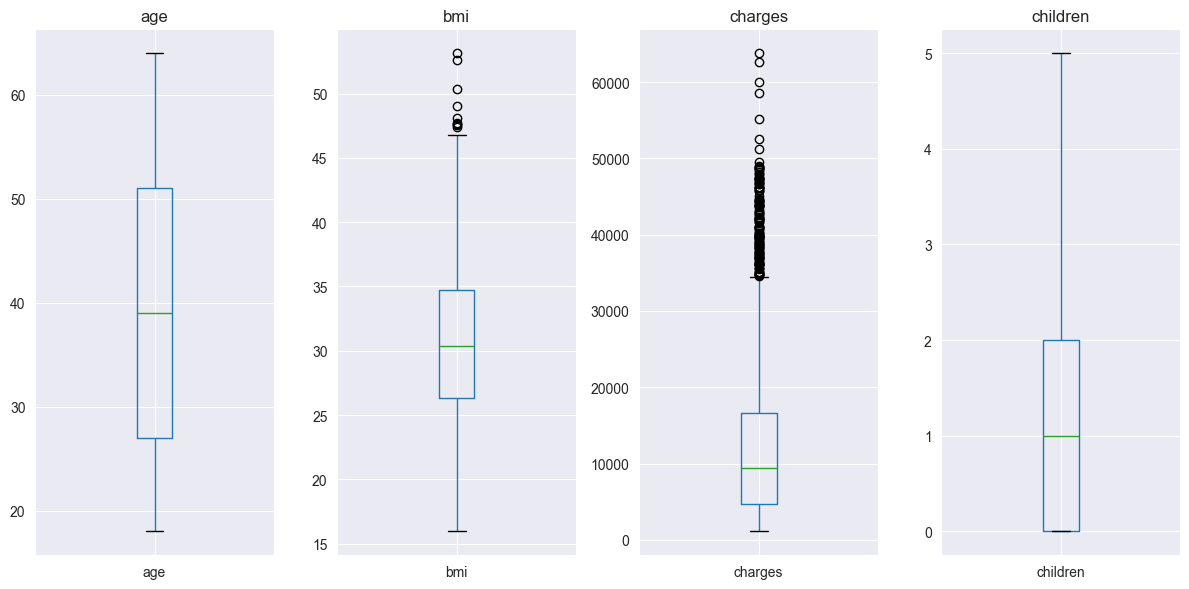

In [79]:
numeric_features = ['age', 'bmi', 'charges', 'children']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_features):
    plt.subplot(1, len(numeric_features), i + 1)
    data.boxplot(column=feature)
    plt.title(feature)
plt.tight_layout()
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

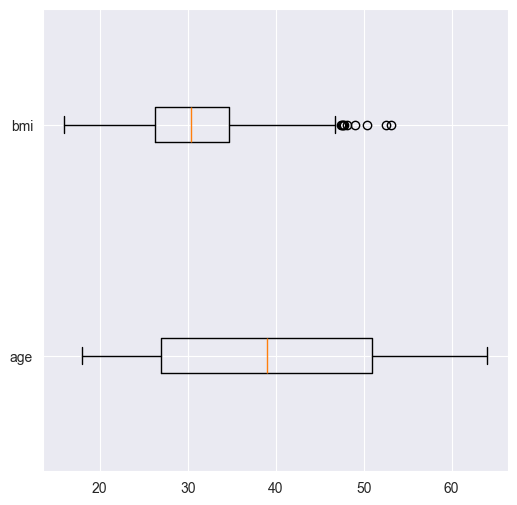

In [80]:
plt.figure(figsize=(6, 6))
plt.boxplot([data['age'], data['bmi']], labels=['age', 'bmi'], vert=False)
plt.scatter(data['age'], s=1.5)
plt.scatter(data['bmi'], s=1.5)
plt.xticks(range(0, 105, 5))
plt.grid()
plt.show()


# Используя признак charges или imb, проверить, выполняется ли центральная предельная теорема.
# Использовать различные длины выборок n. Количество выборок = 300.
# Вывести результат в виде гистограмм. Найти стандартное отклонение и среднее для полученных распределений. Сделать выводы.


Средние значения средних значений выборок (charges):
[13325.215739149764]
Стандартные отклонения средних значений выборок (charges):
[1238.9473513276175]


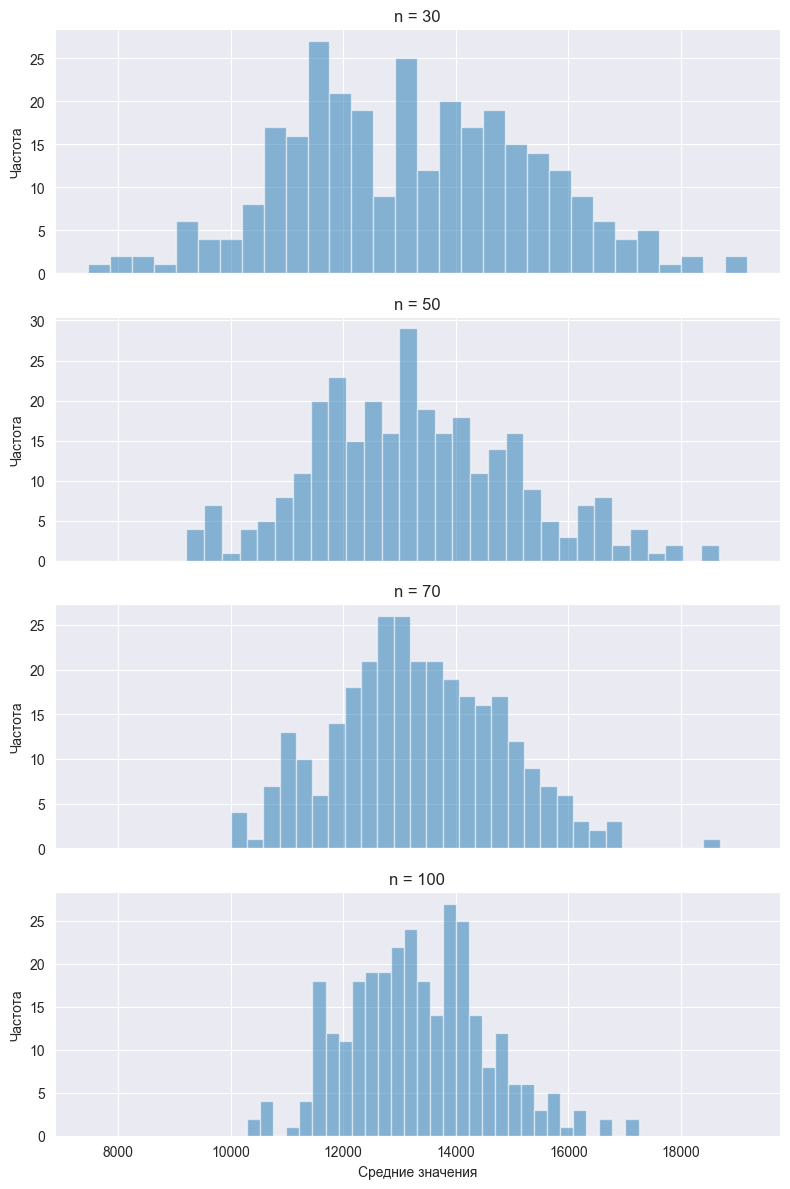

In [81]:
selected_feature = 'charges'

num_samples = 300

sample_sizes = [30, 50, 70, 100]

fig, axes = plt.subplots(len(sample_sizes), 1, figsize=(8, 12), sharex=True)

for i, n in enumerate(sample_sizes):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data[selected_feature], size=n, replace=True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    axes[i].hist(sample_means, bins=30, alpha=0.5)
    axes[i].set_title(f'n = {n}')
    axes[i].set_ylabel('Частота')

plt.xlabel('Средние значения')

means = [np.mean(sample_means[i:i + num_samples]) for i in range(0, len(sample_means), num_samples)]
stds = [np.std(sample_means[i:i + num_samples]) for i in range(0, len(sample_means), num_samples)]

print(f"Средние значения средних значений выборок ({selected_feature}):")
print(means)
print(f"Стандартные отклонения средних значений выборок ({selected_feature}):")
print(stds)

plt.tight_layout()
plt.show()

# Построить 95% и 99% доверительный интервал для среднего значения расходов и среднего значения индекса массы тела

In [82]:
selected_features = ['charges', 'bmi']

confidence_levels = [0.95, 0.99]

confidence_intervals = {}

for feature in selected_features:
    confidence_intervals[feature] = {}
    for confidence_level in confidence_levels:
        data_feature = data[feature]
        n = len(data_feature)
        mean = np.mean(data_feature)
        std = np.std(data_feature)

        z_score = stats.norm.ppf((1 + confidence_level) / 2)

        margin_of_error = z_score * (std / np.sqrt(n))

        lower_bound = mean - margin_of_error
        upper_bound = mean + margin_of_error

        confidence_intervals[feature][confidence_level] = (lower_bound, upper_bound)

# Вывод результатов
for feature, intervals in confidence_intervals.items():
    print(f"Доверительные интервалы для {feature}:")
    for confidence_level, interval in intervals.items():
        print(f"Для {confidence_level * 100}% доверительный интервал: ({interval[0]}, {interval[1]})")
    print()

Доверительные интервалы для charges:
Для 95.0% доверительный интервал: (12621.784504975403, 13919.06002530711)
Для 99.0% доверительный интервал: (12417.967749036661, 14122.876781245852)

Доверительные интервалы для bmi:
Для 95.0% доверительный интервал: (30.336765099698106, 30.99002862227499)
Для 99.0% доверительный интервал: (30.234129961781765, 31.092663760191332)



# Проверить распределения следующих признаков на нормальность: индекс массы тела, расходы.
# Сформулировать нулевую и альтернативную гипотезы. Для каждого признака использовать KS-тест и q-q plot.
# Сделать выводы на основе полученных p-значений.

KS-тест для bmi:
KS-статистика: 0.026099881197044872
p-значение: 0.3162798242838005
Распределение bmi можно считать нормальным (не отвергаем H0)


<Figure size 1200x800 with 0 Axes>

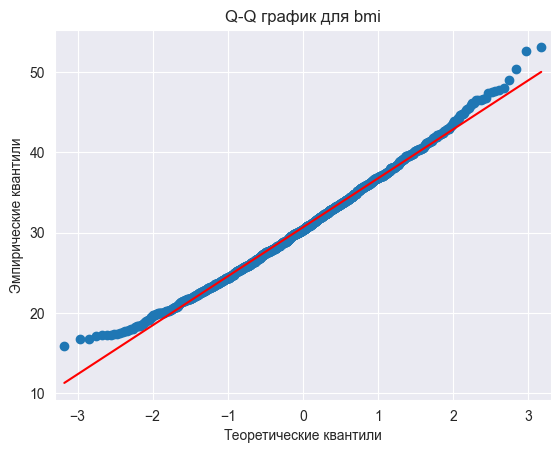

KS-тест для charges:
KS-статистика: 0.18846450965981876
p-значение: 4.381949677777398e-42
Распределение charges не является нормальным (отвергаем H0)


<Figure size 1200x800 with 0 Axes>

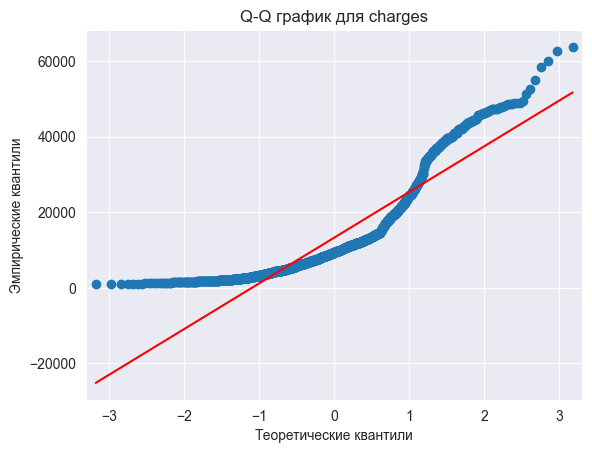

In [83]:
import statsmodels.api as sm

selected_features = ['bmi', 'charges']

alpha = 0.05

for feature in selected_features:
    ks_statistic, ks_p_value = stats.kstest(data[feature], 'norm', (data[feature].mean(), data[feature].std()))

    plt.figure(figsize=(12, 8))
    sm.qqplot(data[feature], line='s')
    plt.title(f'Q-Q график для {feature}')
    plt.xlabel('Теоретические квантили')
    plt.ylabel('Эмпирические квантили')

    print(f'KS-тест для {feature}:')
    print(f'KS-статистика: {ks_statistic}')
    print(f'p-значение: {ks_p_value}')

    if ks_p_value > alpha:
        print(f'Распределение {feature} можно считать нормальным (не отвергаем H0)')
    else:
        print(f'Распределение {feature} не является нормальным (отвергаем H0)')

    plt.show()

# Загрузить данные из файла “ECDCCases.csv”.

In [84]:
ecdcc_data = pd.read_csv('../Datasets_for_work/Data_3/ECDCCases.csv')
ecdcc_data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
...,...,...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [85]:
ecdcc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61904 entries, 0 to 61903
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61904 non-null  object 
 1   day                                                         61904 non-null  int64  
 2   month                                                       61904 non-null  int64  
 3   year                                                        61904 non-null  int64  
 4   cases                                                       61904 non-null  int64  
 5   deaths                                                      61904 non-null  int64  
 6   countriesAndTerritories                                     61904 non-null  object 
 7   geoId                                                       61629 non-null  object 
 

# Проверить в данных наличие пропущенных значений.
# Вывести количество пропущенных значений в процентах.

In [86]:
missing_percentage = (ecdcc_data.isnull().sum() / len(ecdcc_data)) * 100
print("Процент пропущенных значений по каждому признаку:")
missing_percentage

Процент пропущенных значений по каждому признаку:


dateRep                                                       0.000000
day                                                           0.000000
month                                                         0.000000
year                                                          0.000000
cases                                                         0.000000
deaths                                                        0.000000
countriesAndTerritories                                       0.000000
geoId                                                         0.444236
countryterritoryCode                                          0.198695
popData2019                                                   0.198695
continentExp                                                  0.000000
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    4.650750
dtype: float64

# Удалить два признака, в которых больше всех пропущенных значений

In [87]:
columns_to_drop = missing_percentage.nlargest(2).index

ecdcc_data.drop(columns=columns_to_drop, inplace=True)
columns_to_drop

Index(['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'geoId'], dtype='object')

# Для оставшихся признаков обработать пропуски: для категориального признака использовать заполнение значением по умолчанию
# (например, «other»), для числового признака использовать заполнение медианным значением. Показать, что пропусков больше в данных нет

In [88]:
categorical_columns = ecdcc_data.select_dtypes(include=['object']).columns
ecdcc_data[categorical_columns] = ecdcc_data[categorical_columns].fillna('other')

numeric_columns = ecdcc_data.select_dtypes(include=['int', 'float']).columns
ecdcc_data[numeric_columns] = ecdcc_data[numeric_columns].fillna(ecdcc_data[numeric_columns].median())
ecdcc_data


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZWE,14645473.0,Africa
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZWE,14645473.0,Africa


# Показать, что пропусков больше в данных нет.

In [89]:
missing_percentage = (ecdcc_data.isnull().sum() / len(ecdcc_data)) * 100
print("Процент пропущенных значений по каждому признаку:")
missing_percentage

Процент пропущенных значений по каждому признаку:


dateRep                    0.0
day                        0.0
month                      0.0
year                       0.0
cases                      0.0
deaths                     0.0
countriesAndTerritories    0.0
countryterritoryCode       0.0
popData2019                0.0
continentExp               0.0
dtype: float64

In [90]:
print("Пропусков больше нет:")
print(ecdcc_data.isnull().sum().sum())

Пропусков больше нет:
0


# Посмотреть статистику по данным, используя describe().

In [91]:
data_description = ecdcc_data.describe()
data_description

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.091909e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529798e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


# Сделать выводы о том, какие признаки содержат выбросы.

In [92]:
numeric_features = ecdcc_data.select_dtypes(include=['int', 'float'])

outliers = {}
for feature in numeric_features.columns:
    Q1 = data_description.loc['25%'][feature]
    Q3 = data_description.loc['75%'][feature]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    feature_outliers = ecdcc_data[(ecdcc_data[feature] < lower_bound) | (ecdcc_data[feature] > upper_bound)]
    outliers[feature] = feature_outliers

for feature, outlier_df in outliers.items():
    print(f"Выбросы для признака '{feature}':")
    print(outlier_df)

Выбросы для признака 'day':
Empty DataFrame
Columns: [dateRep, day, month, year, cases, deaths, countriesAndTerritories, countryterritoryCode, popData2019, continentExp]
Index: []
Выбросы для признака 'month':
Empty DataFrame
Columns: [dateRep, day, month, year, cases, deaths, countriesAndTerritories, countryterritoryCode, popData2019, continentExp]
Index: []
Выбросы для признака 'year':
          dateRep  day  month  year  cases  deaths   countriesAndTerritories  \
341    31/12/2019   31     12  2019      0       0               Afghanistan   
967    31/12/2019   31     12  2019      0       0                   Algeria   
2668   31/12/2019   31     12  2019      0       0                   Armenia   
3285   31/12/2019   31     12  2019      0       0                 Australia   
3635   31/12/2019   31     12  2019      0       0                   Austria   
...           ...  ...    ...   ...    ...     ...                       ...   
55850  31/12/2019   31     12  2019      0       

# Посмотреть, для каких стран количество смертей в день превысило 3000 и сколько таких дней было.

In [93]:
high_death_countries = ecdcc_data[ecdcc_data['deaths'] > 3000]
num_days_with_high_death = len(high_death_countries)
print(f"Количество дней с количеством смертей в день более 3000: {num_days_with_high_death}")

Количество дней с количеством смертей в день более 3000: 11


In [94]:
high_death_countries

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
2118,02/10/2020,2,10,2020,14001,3351,Argentina,ARG,44780675.0,America
16908,07/09/2020,7,9,2020,-8261,3800,Ecuador,ECU,17373657.0,America
37038,09/10/2020,9,10,2020,4936,3013,Mexico,MEX,127575529.0,America
44888,14/08/2020,14,8,2020,9441,3935,Peru,PER,32510462.0,America
44909,24/07/2020,24,7,2020,4546,3887,Peru,PER,32510462.0,America
59007,12/12/2020,12,12,2020,234633,3343,United_States_of_America,USA,329064917.0,America
59009,10/12/2020,10,12,2020,220025,3124,United_States_of_America,USA,329064917.0,America
59016,03/12/2020,3,12,2020,203311,3190,United_States_of_America,USA,329064917.0,America
59239,24/04/2020,24,4,2020,26543,3179,United_States_of_America,USA,329064917.0,America
59245,18/04/2020,18,4,2020,30833,3770,United_States_of_America,USA,329064917.0,America


# Найти дублирование данных. Удалить дубликаты

In [95]:
ecdcc_data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZWE,14645473.0,Africa
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZWE,14645473.0,Africa


In [96]:
ecdcc_data = ecdcc_data.drop_duplicates()
ecdcc_data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia
5,10/12/2020,10,12,2020,202,16,Afghanistan,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZWE,14645473.0,Africa
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZWE,14645473.0,Africa


#	Загрузить данные из файла “bmi.csv”. Взять оттуда две выборки.
#	Одна выборка – это индекс массы тела людей c региона northwest, вторая выборка – это индекс массы тела людей с региона southwest.
#	Сравнить средние значения этих выборок, используя t-критерий Стьюдента.
#	Предварительно проверить выборки на нормальность (критерий Шопиро- Уилка) и на гомогенность дисперсии (критерий Бартлетта).


In [97]:
bmi_data = pd.read_csv('../Datasets_for_work/Data_3/bmi.csv')
bmi_data

,bmi,region
0,22.705,northwest
1,28.880,northwest
2,27.740,northwest
3,25.840,northwest
4,28.025,northwest
...,...,...
645,20.600,southwest
646,38.600,southwest
647,33.400,southwest
648,44.700,southwest


In [98]:
northwest_bmi = bmi_data[bmi_data['region'] == 'northwest']['bmi']
southwest_bmi = bmi_data[bmi_data['region'] == 'southwest']['bmi']

In [99]:
northwest_bmi

0      22.705
1      28.880
2      27.740
3      25.840
4      28.025
        ...  
320    26.315
321    31.065
322    25.935
323    30.970
324    29.070
Name: bmi, Length: 325, dtype: float64

In [100]:
southwest_bmi

325    27.9
326    34.4
327    24.6
328    40.3
329    35.3
       ... 
645    20.6
646    38.6
647    33.4
648    44.7
649    25.8
Name: bmi, Length: 325, dtype: float64

In [101]:
from scipy.stats import shapiro

p_value_nw = shapiro(northwest_bmi)
p_value_sw = shapiro(southwest_bmi)

print(f'p-value для выборки из northwest: {p_value_nw}')
print(f'p-value для выборки из southwest: {p_value_sw}')

p-value для выборки из northwest: ShapiroResult(statistic=0.9954646825790405, pvalue=0.4655335247516632)
p-value для выборки из southwest: ShapiroResult(statistic=0.9949268698692322, pvalue=0.3629520535469055)


Если значение p-value для обеих выборок больше 0.05, то можно предположить, что данные распределены нормально.

In [102]:
from scipy.stats import bartlett

p_value_bartlett = bartlett(northwest_bmi, southwest_bmi)

print(f'p-value критерия Бартлетта: {p_value_bartlett}')

p-value критерия Бартлетта: BartlettResult(statistic=3.4000745256459286, pvalue=0.06519347353581818)


Если значение p-value критерия Бартлетта больше 0.05, то можно предположить, что дисперсии в обеих выборках схожи (гомогенность дисперсии).

In [103]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(northwest_bmi, southwest_bmi)

print(f'Значение t-статистики: {t_stat}')
print(f'p-value t-теста: {p_value}')

Значение t-статистики: -3.2844171500398582
p-value t-теста: 0.001076958496307695


Если значение p-value меньше выбранного уровня значимости (например, 0.05), то можно сделать вывод о статистической разнице между средними значениями двух выборок.

Обратите внимание, что для корректного применения t-критерия Стьюдента, данные должны соответствовать условиям нормального распределения и гомогенности дисперсии.

In [104]:
from scipy.stats import chisquare

expected_counts = [100] * 6

observed_counts = [97, 98, 109, 95, 97, 104]

chi_square_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f'Значение статистики Хи-квадрат: {chi_square_stat}')
print(f'p-value: {p_value}')

Значение статистики Хи-квадрат: 1.44
p-value: 0.9198882077437889


# С помощью критерия Хи-квадрат проверить, являются ли переменные зависимыми.
# Использовать функцию scipy.stats.chi2_contingency(). Влияет ли семейное положение на занятость?


In [105]:
from scipy.stats import chi2_contingency

data = pd.DataFrame({'Женат': [89, 17, 11, 43, 22, 1],
                     'Гражданский брак': [80, 22, 20, 35, 6, 4],
                     'Не состоит в отношениях': [35, 44, 35, 6, 8, 22]})
data.index = ['Полный рабочий день', 'Частичная занятость', 'Временно не работает', 'На домохозяйстве', 'На пенсии', 'Учёба']

chi2_stat, p_value, dof, expected = chi2_contingency(data)

print(f'Значение статистики Хи-квадрат: {chi2_stat}')
print(f'p-value: {p_value}')
print(f'Степени свободы: {dof}')

Значение статистики Хи-квадрат: 122.29654948595365
p-value: 1.7291616900960234e-21
Степени свободы: 10


Если p-value меньше выбранного уровня значимости (например, 0.05), то можно заключить, что семейное положение влияет на занятость. Если p-value больше уровня значимости, то нет достаточных доказательств для отвержения нулевой гипотезы о независимости семейного положения и занятости.